# Take a double image based on a velocity field

Often, we take an image for a given flow field.

In [1]:
import numpy as np

import synpivimage as spi 
from synpivimage import take_image, Camera, Laser, Particles
spi.__version__

'1.0.0'

In [2]:
cam = Camera(
    nx=512,
    ny=512,
    bit_depth=16,
    qe=1,
    sensitivity=1,
    baseline_noise=50,
    dark_noise=10,
    shot_noise=False,
    fill_ratio_x=1.0,
    fill_ratio_y=1.0,
    particle_image_diameter=2  # px
)

laser = Laser(
    width=0.25,
    shape_factor=2
)

In [3]:
ppp = 0.1
n = int(ppp * (5+cam.nx*cam.ny))  # +5 so that images can move into image B

particles = Particles(
    x=np.random.uniform(-1, cam.nx-1, n),
    y=np.random.uniform(0, cam.ny-1, n),
    z=np.zeros(n),
    size=np.ones(n)*2,
)

In [4]:
imgA, partA = take_image(laser, cam, particles, particle_peak_count=1000)

imgB, partB = take_image(laser, cam,
                         partA.displace(dx=4, dz=laser.width/2),
                         particle_peak_count=1000)


(<Axes: >, <Axes: >)

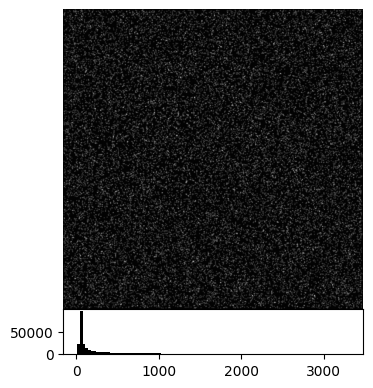

In [5]:
imgA.plot()

Generate a velocity field. The resolution is smaller than the pixel resolution to illustrate the interpolation method from the velocity field onto the pixel coordinates

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0, 'x-displacement in pixels')

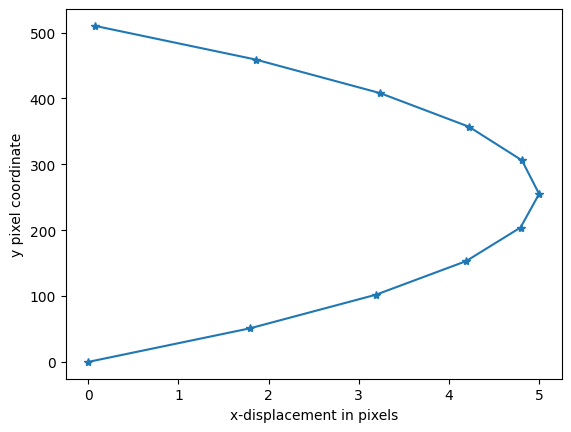

In [7]:
y = np.arange(0, cam.ny, cam.ny // 10)
dx = 5
u = dx*((cam.ny/2)**2-(y-cam.ny/2)**2)/cam.ny**2*4
plt.plot(u, y, marker='*')
plt.ylabel('y pixel coordinate')
plt.xlabel('x-displacement in pixels')

In [8]:
from scipy import interpolate

In [9]:
dx_interpolator = interpolate.RegularGridInterpolator(
    (y,),
    u,
    method='cubic'
)

In [10]:
x = np.linspace(-20, cam.nx+10, 5)
y = np.linspace(-20, cam.ny+10, 5)
xx, yy = np.meshgrid(x, y)

uu = dx*((cam.ny/2)**2-(yy-cam.ny/2)**2)/cam.ny**2*4

dx_interpolator = interpolate.RegularGridInterpolator(
    (y, x),
    uu,
    method='cubic'
)

In [11]:
xpixel = np.arange(0, cam.nx, 1)
ypixel = np.arange(0, cam.ny, 1)

xx_cam, yy_cam = np.meshgrid(xpixel, ypixel)

uinterpolated = dx_interpolator((ypixel, xpixel))

Text(0.5, 0, 'x-displacement in pixels')

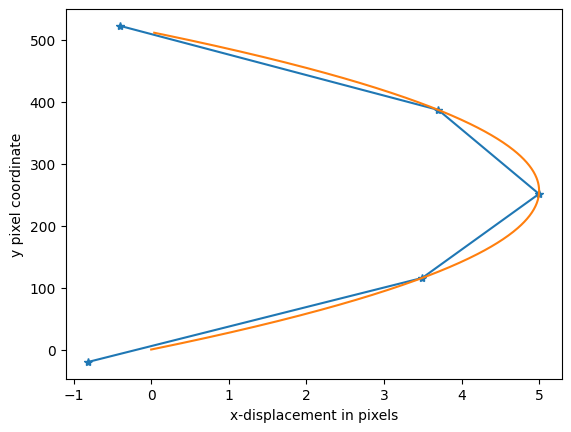

In [12]:
plt.plot(uu[:, 0], yy[:, 0], marker='*')
plt.plot(uinterpolated, yy_cam[:, 0])
plt.ylabel('y pixel coordinate')
plt.xlabel('x-displacement in pixels')